In [19]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

In [20]:
# Turn down for faster convergence
train_samples = 60000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [21]:
# ensures randomized order of the dataset
random_state = check_random_state(0)

#random shuffling X and y
permutation = random_state.permutation(X.index)
X = X.loc[permutation].reset_index(drop=True)
y = y.loc[permutation].reset_index(drop=True)

# Converts input features into a 2D format for logistic regression or SVMs
X = X.values.reshape((X.shape[0], -1))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Define classifier
clf = SGDClassifier(loss="hinge", max_iter=5000)

clf.fit(X_train, y_train)

# Evaluate model
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

print(f"Train Accuracy: {train_score:.4f}")
print(f"Test Accuracy:  {test_score:.4f}")


Train Accuracy: 0.9083
Test Accuracy:  0.8955


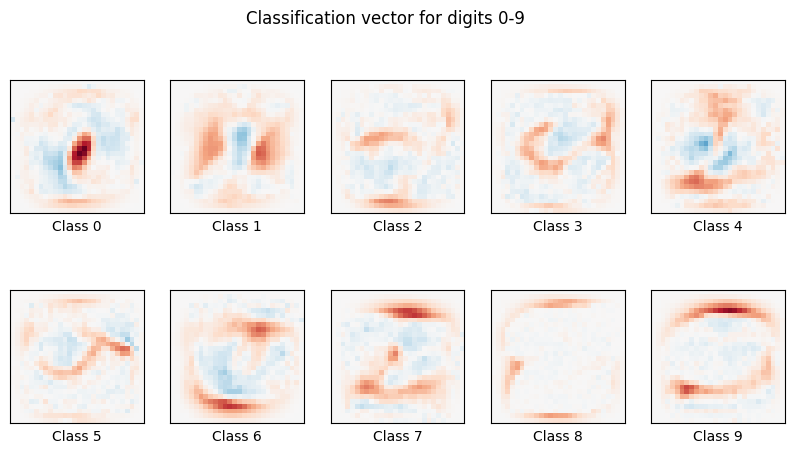

In [25]:
#clf.coef_ contains the weights learned by the LR model for each class
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10): #The dataset has 10 classes (digits 0–9 for MNIST)
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for digits 0-9')
plt.show()

<Figure size 800x600 with 0 Axes>

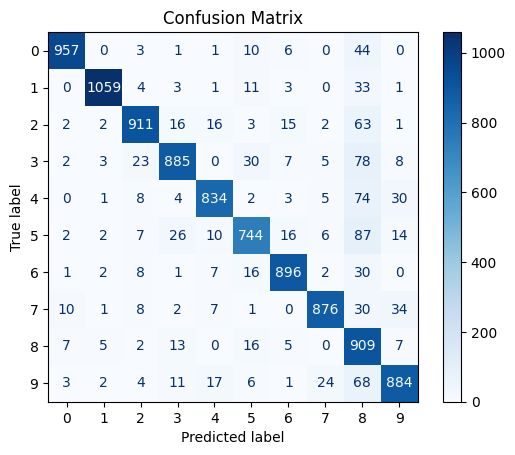

In [26]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels for the test set
y_pred = clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [27]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1022
           1       0.98      0.95      0.97      1115
           2       0.93      0.88      0.91      1031
           3       0.92      0.85      0.88      1041
           4       0.93      0.87      0.90       961
           5       0.89      0.81      0.85       914
           6       0.94      0.93      0.94       963
           7       0.95      0.90      0.93       969
           8       0.64      0.94      0.76       964
           9       0.90      0.87      0.88      1020

    accuracy                           0.90     10000
   macro avg       0.91      0.89      0.90     10000
weighted avg       0.91      0.90      0.90     10000

